<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"></ul></div>

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

In [ ]:
img = cv2.imread('img/lena.jpg')
plt.imshow(img, cmap='gray', interpolation='bicubic')
plt.xticks([]), plt.yticks([])  # 隐藏横纵坐标

In [ ]:
img = cv2.imread('img/lena.jpg')   # 彩色图像使用OpenCV加载时是BGR模式。但是Matplotib是RGB模式
b, g, r = cv2.split(img)            
img2 = cv2.merge([r, g, b])        # 按照RGB模式组合图片

plt.subplot(121); plt.imshow(img); plt.xticks([]), plt.yticks([])
plt.subplot(122); plt.imshow(img2); plt.xticks([]), plt.yticks([])

In [ ]:
# 用摄像头捕获视频

cap = cv2.VideoCapture(0)     
while 1:
    ret, frame = cap.read()
    
#     gray = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)            # 摄像头捕获灰色视频
#     cv2.imshow('frame', gray)

    cv2.imshow('frame', frame)                                 # 摄像头捕获彩色视频
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
        
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture(0)
for i in range(19):
    print cap.get(i)         # 每一个数代表视频的一个属性
cap.release()

In [ ]:
# 通过摄像头录制视频并对每一帧进行处理

cap = cv2.VideoCapture(0)
out = cv2.VideoWriter('video/output.avi', cv2.VideoWriter_fourcc(*'XVID'), 20.0, (640, 480))
# (filename, fourcc, fps, frameSize[, isColor])

while cap.isOpened():
    ret, frame = cap.read()
    if ret:
        frame = cv2.flip(frame, 0)    # 翻转视频
        out.write(frame)
        cv2.imshow('frame', frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

cap.release()
out.release()
cv2.destroyAllWindows()

In [ ]:
# 画线

img = np.zeros((512, 512, 3), np.uint8)                          # 准备画布 black image
cv2.line(img, (0, 0), (511, 511), (255, 0, 0), 5)                # 线条
cv2.rectangle(img, (384, 0), (510, 128), (0, 255, 0), 3)         # 矩形
cv2.circle(img, (447, 63), 63, (0, 0, 255), -1)                  # 圆形
cv2.ellipse(img, (256, 256), (100, 50), 0, 0, 180, 255, -1)      # 椭圆

# 添加字体 
cv2.putText(img, 'OpenCV', (10, 500), cv2.FONT_HERSHEY_SIMPLEX, 4, (255, 255, 255), cv2.LINE_AA)  
'''
• 绘制的文字
• 绘制的位置
• 字体类型
• 字体的大小
• 文字的颜色，粗细，线条的类型等
'''

plt.imshow(img)

In [ ]:
# 查看所有被支持的鼠标事件

events = [ i for i in dir(cv2) if 'EVENT' in i]
print events

In [ ]:
# 示例: 在图片上双击过的位置绘制一个圆圈

# 定义鼠标回调事件 (所有的鼠标事件回调函数都有一个统一的格式)
def draw_circle(event, x, y, flags, param):
    if event == cv2.EVENT_LBUTTONDBLCLK:
        cv2.circle(img, (x, y), 20, (255, 0, 0), -1)
        
img = np.zeros((512, 512), np.uint8)
cv2.namedWindow('image')

# 将窗口与回调函数绑定
cv2.setMouseCallback('image', draw_circle)

while 1:
    cv2.imshow('image', img)
    if cv2.waitKey(20) & 0xFF == 27:   # 按'Esc'键退出
        break
        
cv2.destroyAllWindows()        

In [ ]:
# 示例: 通过调节滑动条来设定画板颜色

def nothing(x):
    pass

img = np.zeros((300, 512, 3), np.uint8)
cv2.namedWindow('image')

cv2.createTrackbar('R', 'image', 0, 255, nothing)
cv2.createTrackbar('G', 'image', 0, 255, nothing)
cv2.createTrackbar('B', 'image', 0, 255, nothing)
'''
• 第一个参数是滑动条的名字
• 第二个参数是滑动条被放置窗口的名字
• 第三个参数是滑动条的默认位置
• 第四个参数是滑动条的最大值
• 第五个函数是回调函数; 每次滑动条的滑动都会调用回调函数。回调函数通常都会含有一个默认参数，就是滑动条的位置
'''

switch = '0:OFF\n1:ON'
cv2.createTrackbar(switch, 'image', 0, 1, nothing)   # 将滑动条用作转换按钮

while 1:
    cv2.imshow('image', img)
    if cv2.waitKey(1) & 0xFF == 27:
        break
        
    r = cv2.getTrackbarPos('R', 'image')
    g = cv2.getTrackbarPos('G', 'image')
    b = cv2.getTrackbarPos('B', 'image')
    s = cv2.getTrackbarPos(switch, 'image')
    
    if s == 0:
        img[:] = 0
    else:
        img[:] = [b, g, r]
        
cv2.destroyAllWindows()

In [ ]:
# 彩色图片操作
img = cv2.imread("img/lena.jpg")
print img[100, 100]   # [ 87  74 182]

# img.shape 可以获取图像的形状; 他的返回值是一个包含行数，列数，通道数的元组
print img.shape       # (512, 512, 3)   

# img.size 可以返回图像的像素数目
print img.size        # 786432 (= 512*512*3)

# img.dtype 返回图像的数据类型
print img.dtype       # uint8



# 灰色图片操作
img = cv2.imread("img/lena.jpg", cv2.IMREAD_GRAYSCALE)
print img[100, 100]   # 108
print img.shape       # (512, 512)
print img.size        # 262144 (= 512*512)
print img.dtype       # uint8

In [ ]:
# 拆分及合并图像通道

img = cv2.imread("img/lena.jpg")

# 把 BGR 拆分成单个通道  (cv2.split()是一个比较耗时的操作, 慎用!)
b, g, r = cv2.split(img)

# 把独立通道的图片合并成一个 RGB 图像
img2 = cv2.merge([r, g, b])

# 将所有像素的红色通道值都为 0
img3 = img[:, :, 0]

plt.subplot(131); plt.imshow(img)
plt.subplot(132); plt.imshow(img2)
plt.subplot(133); plt.imshow(img3)

In [ ]:
# 图像混合  dst = α · img1 + β · img2 + γ  （α + β = 1）

img1 = cv2.imread('img/pic1.png')
img2 = cv2.imread('img/pic2.png')
dst = cv2.addWeighted(img1, 0.6, img2, 0.4, 0)

plt.subplot(131); plt.imshow(img1)
plt.subplot(132); plt.imshow(img2)
plt.subplot(133); plt.imshow(dst)

In [ ]:
img = cv2.imread('img/opencv-logo.jpg')
# plt.imshow(img[:,:,::-1])

img2gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 阀值操作 (http://www.opencv.org.cn/opencvdoc/2.3.2/html/doc/tutorials/imgproc/threshold/threshold.html)
ret, mask = cv2.threshold(img2gray, 175, 255, 0)

plt.subplot(121); plt.imshow(img[:,:,::-1])
plt.subplot(122); plt.imshow(mask)

In [ ]:
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
print len(flags), flags

In [ ]:
# Get HSV code in realtime

cap = cv2.VideoCapture(0)

def nothing(x):
    pass
# Creating a window for later use
cv2.namedWindow('result')

# Starting with 100's to prevent error while masking
h,s,v = 100, 100, 100

# Creating track bar
cv2.createTrackbar('h', 'result', 0, 179, nothing)
cv2.createTrackbar('s', 'result', 0, 255, nothing)
cv2.createTrackbar('v', 'result', 0, 255, nothing)

while(1):

    _, frame = cap.read()

    #converting to HSV
    hsv = cv2.cvtColor(frame,cv2.COLOR_BGR2HSV)

    # get info from track bar and appy to result
    h = cv2.getTrackbarPos('h','result')
    s = cv2.getTrackbarPos('s','result')
    v = cv2.getTrackbarPos('v','result')

    # Normal masking algorithm
    lower_blue = np.array([h,s,v])
    upper_blue = np.array([180,255,255])

    mask = cv2.inRange(hsv,lower_blue, upper_blue)

    result = cv2.bitwise_and(frame,frame,mask = mask)

    cv2.imshow('result',result)

    k = cv2.waitKey(5) & 0xFF
    if k == 27:
        break

cap.release()

cv2.destroyAllWindows()

In [ ]:
# 缩放图片尺寸
# resize(src, dsize[, dst[, fx[, fy[, interpolation]]]]) -> dst

img = cv2.imread('img/lena.jpg')

# 下面的 None 本应该是输出图像的尺寸，但是因为后边我们设置了缩放因子
img2 = cv2.resize(img, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

# 下面直接设置输出图像的尺寸，所以不用设置缩放因子
height, width = img.shape[:2]
img3 = cv2.resize(img, (3*width, 3*height), interpolation=cv2.INTER_CUBIC)

plt.subplot(131); plt.imshow(img[:,:,::-1])
plt.subplot(132); plt.imshow(img2[:,:,::-1])
plt.subplot(133); plt.imshow(img3[:,:,::-1])


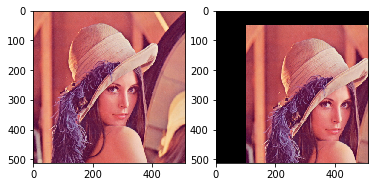

In [4]:
# 图像平移
# 平移就是将对象换一个位置。如果你要沿（x， y）方向移动，移动的距离是（tx， ty），可以以下面的方式构建移动矩阵：
# M = np.float32([[1, 0, tx], [0, 1, ty]])
# warpAffine(src, M, dsize[, dst[, flags[, borderMode[, borderValue]]]]) -> dst


img = cv2.imread('img/lena.jpg')

# 构建移动矩阵
H = np.float32([[1, 0, 100], [0, 1, 50]])

# 获取图片尺寸
rows, cols = img.shape[:2]
res = cv2.warpAffine(img, H, (rows, cols))

plt.subplot(121); plt.imshow(img[:,:,::-1])
plt.subplot(122); plt.imshow(res[:,:,::-1])

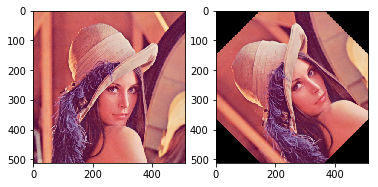

In [11]:
# 图像旋转

img = cv2.imread('img/lena.jpg')

rows, cols = img.shape[:2]

# 构造旋转矩阵
M = cv2.getRotationMatrix2D((cols/2, rows/2), 45, 1)
'''
getRotationMatrix2D(center, angle, scale) -> retval
• 第一个参数为旋转中心
• 第二个为旋转角度
• 第三个为旋转后的缩放因子
'''

dst = cv2.warpAffine(img, M, (cols, rows))

plt.subplot(121); plt.imshow(img[:,:,::-1])
plt.subplot(122); plt.imshow(dst[:,:,::-1])

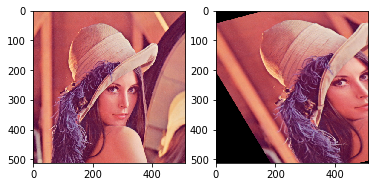

In [13]:
# 图像的仿射
'''
图像的旋转加上拉升就是图像仿射变换，仿射变化也是需要一个M矩阵就可以，但是由于仿射变换比较复杂，
一般直接找很难找到这个矩阵，opencv提供了根据变换前后三个点的对应关系来自动求解M。
这个函数是 M=cv2.getAffineTransform(pos1,pos2),其中两个位置就是变换前后的对应位置关系;
输出的就是仿射矩阵M
'''

'''
仿射变换是透射变换的一个特例。其仿射变换是线性的，其需要的是2*3的矩阵和三个控点。
透视变换是非线性的，其需要的是3*3的矩阵和四个控点
'''

img = cv2.imread('img/lena.jpg')

rows, cols = img.shape[:2]

# 根据变换前后三个点的对应关系来自动求解M
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[10, 100], [200, 50], [100, 250]])
M = cv2.getAffineTransform(pts1, pts2)

dst = cv2.warpAffine(img, M, (rows, cols))

plt.subplot(121); plt.imshow(img[:,:,::-1])
plt.subplot(122); plt.imshow(dst[:,:,::-1])

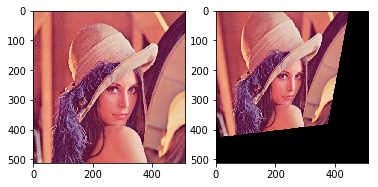

In [15]:
# 图像的透射
'''
透视需要的是一个3*3的矩阵，同理opencv在构造这个矩阵的时候还是采用一种点对应的关系来通过函数自己寻找的，
这个函数是 M = cv2.getPerspectiveTransform(pts1,pts2)，其中pts需要变换前后的4个点对应位置
'''

img = cv2.imread('img/lena.jpg')

rows, cols = img.shape[:2]

# 根据变换前后三个点的对应关系来自动求解M
pts1 = np.float32([[56,65],[238,52],[28,237],[239,240]])
pts2 = np.float32([[0,0],[200,0],[0,200],[200,200]])
M = cv2.getPerspectiveTransform(pts1, pts2)

dst = cv2.warpPerspective(img, M, (rows, cols))

plt.subplot(121); plt.imshow(img[:,:,::-1])
plt.subplot(122); plt.imshow(dst[:,:,::-1])

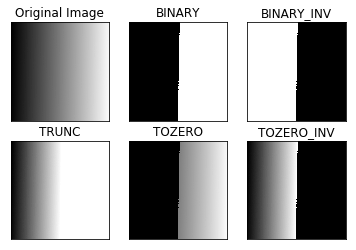

In [18]:
# 简单阀值（2D图像）  https://blog.csdn.net/JNingWei/article/details/77747959
'''
像素值高于阈值时，我们给这个像素赋予一个新值（可能是白色），否则我们给它赋予另外一种颜色（也许是黑色）

threshold(src, thresh, maxval, type[, dst]) -> retval, dst
• 第一个参数就是原图像，原图像应该是灰度图
• 第二个参数就是用来对像素值进行分类的阈值
• 第三个参数就是当像素值高于（有时是小于）阈值时应该被赋予的新的像素值
'''

img = cv2.imread('img/gradient.png', 0)

ret, thresh1 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
ret, thresh2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY_INV)
ret, thresh3 = cv2.threshold(img, 127, 255, cv2.THRESH_TRUNC)
ret, thresh4 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO)
ret, thresh5 = cv2.threshold(img, 127, 255, cv2.THRESH_TOZERO_INV)


titles = ['Original Image', 'BINARY', 'BINARY_INV', 'TRUNC', 'TOZERO', 'TOZERO_INV']
images = [img, thresh1, thresh2, thresh3, thresh4, thresh5]

for i in xrange(6):
    plt.subplot(2, 3, i+1)
    plt.imshow(images[i], 'gray')
    plt.title(titles[i])
    plt.xticks([])
    plt.yticks([])

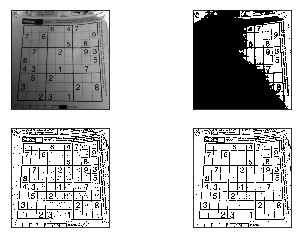

In [23]:
# 自适应阀值（2D图像）
'''
当同一幅图像上的不同部分的具有不同亮度时; 这种情况下我们需要采用自适应阈值。
此时的阈值是根据图像上的每一个小区域计算与其对应的阈值。
因此在同一幅图像上的不同区域采用的是不同的阈值，从而能在亮度不同的情况下得到更好的结果
'''

img = cv2.imread('img/sudoku.png', 0)

#中值滤波  medianBlur(src, ksize[, dst]) -> dst
img = cv2.medianBlur(img, 5)

_, img2 = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)

img3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
img4 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)

'''
adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) -> dst
• adaptiveMethod -- 指定计算阈值的方法
    – cv2.ADPTIVE_THRESH_MEAN_C：阈值取自相邻区域的平均值
    – cv2.ADPTIVE_THRESH_GAUSSIAN_C：阈值取值相邻区域的加权和，权重为一个高斯窗口。
• blockSize -- 邻域大小（用来计算阈值的区域大小）。
• C -- 这就是是一个常数，阈值就等于的平均值或者加权平均值减去这个常数。
'''

titles = ['Original Image', 'Global Thresholding(v=127)', 
          'Adaptive Mean Thresholding', 'Adaptive Gaussian Thresholding']
images = [img, img2, img3, img4]

for i in xrange(4):
    plt.subplot(2, 2, i+1)
    plt.imshow(images[i], 'gray')
    plt.xticks([])
    plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f68ca14b650>,
 Text(0.5,1,'Averaging'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

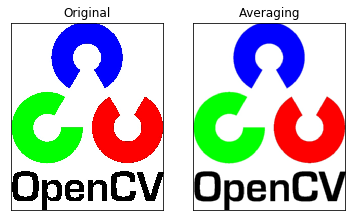

In [28]:
# 通用2D滤波
'''
opencv提供的一个通用的2D滤波函数为cv2.filter2D()， 
滤波函数的使用需要一个核模板，对图像的滤波操作过程为: 
将和模板放在图像的一个像素A上，求与之对应的图像上的每个像素点的和，核不同，得到的结果不同，
而滤波的使用核心也是对于这个核模板的使用，
需要注意的是，该滤波函数是单通道运算的，
也就是说对于彩色图像的滤波，需要将彩色图像的各个通道提取出来，对各个通道分别滤波才行
'''

img = cv2.imread('img/opencv-logo.jpg')

# 定义滤波核模板
kernel = np.ones((5, 5), np.float32)/25

# filter2D(src, ddepth, kernel[, dst[, anchor[, delta[, borderType]]]]) -> dst
dst = cv2.filter2D(img, -1, kernel)

plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(dst),plt.title('Averaging'),plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f68ca172710>,
 Text(0.5,1,'Averaging'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

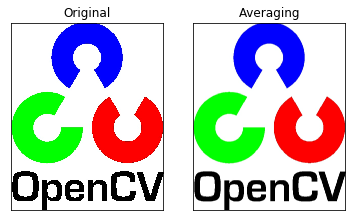

In [29]:
# 均值滤波（归一化块滤波器 (Normalized Box Filter)）
'''
最简单的滤波器， 输出像素值是核窗口内像素值的均值(所有像素加权系数相等)

opencv有一个专门的平均滤波模板供使用–归一化卷积模板，
所有的滤波模板都是使卷积框覆盖区域所有像素点与模板相乘后得到的值作为中心像素的值。
Opencv中均值模板可以用cv2.blur和cv2.boxFilter

注: 滤波核的大小 m*n 是可以设置; 滤波核的每个元素全是'1'
'''

img = cv2.imread('img/opencv-logo.jpg')

# blur(src, ksize[, dst[, anchor[, borderType]]]) -> dst
blur = cv2.blur(img, (3, 5))

plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur),plt.title('Averaging'),plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f68ca5c1c90>,
 Text(0.5,1,'Averaging'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

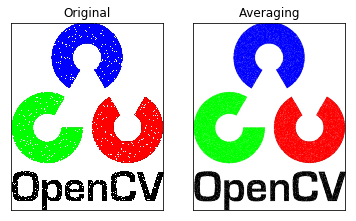

In [31]:
# 高斯模糊
'''
把卷积核换成高斯核（简单来说，方框不变，将原来每个方框的值是相等的，现在里面的值是符合高斯分布的，
方框中心的值最大，其余方框根据距离中心元素的距离递减，构成一个高斯小山包。原来的求平均数现在变成求加权平均数，全就是方框里的值）。
实现的函数是cv2.GaussianBlur()
需要指定高斯核的宽和高(必须是奇数);以及高斯函数沿 X， Y 方向的标准差。
如果只指定了 X 方向的的标准差， Y 方向也会取相同值。
如果两个标准差都是 0，那么函数会根据核函数的大小自己计算。
高斯滤波可以有效的从图像中去除高斯噪音。
也可以使用函数 cv2.getGaussianKernel() 自己构建一个高斯核
'''

img = cv2.imread('img/opencv-logo.jpg')

# 添加噪音
for i in xrange(20000):
    temp_x = np.random.randint(0, img.shape[0])
    temp_y = np.random.randint(0, img.shape[1])
    img[temp_x][temp_y] = 255

# GaussianBlur(src, ksize, sigmaX[, dst[, sigmaY[, borderType]]]) -> dst
blur = cv2.GaussianBlur(img, (5, 5), 0)

plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur),plt.title('Averaging'),plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f68c9fac290>,
 Text(0.5,1,'Averaging'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

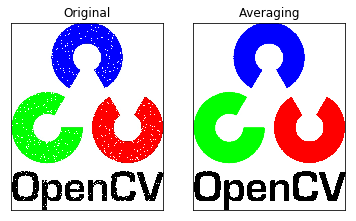

In [32]:
# 中值模糊
'''
用与卷积框对应像素的中值来替代中心像素的值。这个滤波器经常用来去除椒盐噪声。
前面的滤波器都是用计算得到的一个新值来取代中心像素的值，而中值滤波是用中心像素周围（也可以使他本身）的值来取代他。
他能有效的去除噪声。卷积核的大小也应该是一个奇数
'''

img = cv2.imread('img/opencv-logo.jpg')

# 添加噪音
for i in xrange(20000):
    temp_x = np.random.randint(0, img.shape[0])
    temp_y = np.random.randint(0, img.shape[1])
    img[temp_x][temp_y] = 255

# medianBlur(src, ksize[, dst]) -> dst
blur = cv2.medianBlur(img, 5)

plt.subplot(121), plt.imshow(img),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(blur),plt.title('Averaging'),plt.xticks([]), plt.yticks([])

(<matplotlib.axes._subplots.AxesSubplot at 0x7f68ca13e690>,
 Text(0.5,1,'Averaging'),
 ([], <a list of 0 Text xticklabel objects>),
 ([], <a list of 0 Text yticklabel objects>))

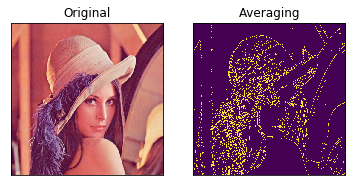

In [35]:
# Canny 边界检测
'''
canny 算法五步骤
* 高斯模糊
* 灰度转换
* 计算梯度
* 非最大信号抑制
* 高低阈值输出二值图像
'''

img = cv2.imread("img/lena.jpg")

# Canny(image, threshold1, threshold2[, edges[, apertureSize[, L2gradient]]]) -> edges
edges = cv2.Canny(img, 100, 100)

plt.subplot(121), plt.imshow(img[:,:,::-1]),plt.title('Original'),plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges),plt.title('Averaging'),plt.xticks([]), plt.yticks([])

In [ ]:
# 示例: 通过调节滑动条来设置阈值 threshold1 和 threshold2 进而来进行 Canny 边界检测

def nothing(x):
    pass

cv2.namedWindow('result')
cv2.createTrackbar('th1', 'result', 0, 255, nothing)
cv2.createTrackbar('th2', 'result', 0, 255, nothing)

image = cv2.imread("img/cat.jpg")

while 1:

    th1 = cv2.getTrackbarPos('th1', 'result')
    th2 = cv2.getTrackbarPos('th2', 'result')

    edges = cv2.Canny(image, th1, th2)
    cv2.imshow('result', edges)

    if cv2.waitKey(5) & 0xFF == 27:
        break

cv2.destroyAllWindows()

(<matplotlib.axes._subplots.AxesSubplot at 0xa68b6a0>,
 <matplotlib.image.AxesImage at 0xa6fa860>)

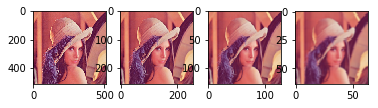

In [8]:
# 图像金字塔
'''
函数 cv2.pyrDown() 从一个高分辨率大尺寸的图像向上构建一个金子塔（尺寸变小，分辨率降低）
pyrDown(src[, dst[, dstsize[, borderType]]]) -> dst

通过将底部图像的连续行与列去掉得到的。每一层图像中的像素值等于下一层图像中对应位置5个像素的高斯加权平均值。
这样操作一个M*N的图像就变成了(M/2)*(N/2)的图像，图像的面积就变为原来的1/4，
连续进行这样的操作，就会得到一系列的金字塔的图像

'''

img = cv2.imread('img/lena.jpg')
img1 = cv2.pyrDown(img)           # 默认情况下把图像按缩小1/4来处理
img2 = cv2.pyrDown(img1)
img3 = cv2.pyrDown(img2)

plt.subplot(141), plt.imshow(img[:,:,::-1])
plt.subplot(142), plt.imshow(img1[:,:,::-1])
plt.subplot(143), plt.imshow(img2[:,:,::-1])
plt.subplot(144), plt.imshow(img3[:,:,::-1])

(<matplotlib.axes._subplots.AxesSubplot at 0xaf6a320>,
 <matplotlib.image.AxesImage at 0xb2764e0>)

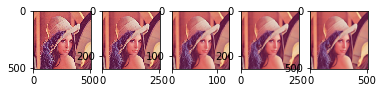

In [12]:
# 图像金字塔
'''
函数 cv2.pyrUp() 从一个低分辨率小尺寸的图像向下构建一个金子塔（尺寸变大，但分辨率不会增加）
pyrUp(src[, dst[, dstsize[, borderType]]]) -> dst

cv2.pyrUp()函数与cv2.pyrDown()函数的功能相反，
把金字塔上层的图像变到下一层来，也就是图像变大，
但是有一点要注意的是，虽然变大了，但是图像并不能恢复成以前的样子，也就是分辨率上不能达到以前的那种效果（仅仅是变大了而已）
'''

img = cv2.imread('img/lena.jpg')
img1 = cv2.pyrDown(img)
img2 = cv2.pyrDown(img1)
img3 = cv2.pyrUp(img2)
img4 = cv2.pyrUp(img3)

plt.subplot(151), plt.imshow(img[:,:,::-1])
plt.subplot(152), plt.imshow(img1[:,:,::-1])
plt.subplot(153), plt.imshow(img2[:,:,::-1])
plt.subplot(154), plt.imshow(img3[:,:,::-1])
plt.subplot(155), plt.imshow(img4[:,:,::-1])

(<matplotlib.axes._subplots.AxesSubplot at 0xb898a20>,
 <matplotlib.image.AxesImage at 0xbc8b198>)

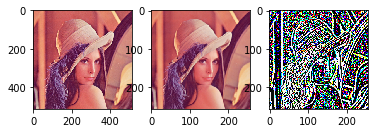

In [14]:


img = cv2.imread('img/lena.jpg') 
img1 = cv2.pyrDown(img)#高斯金字塔
temp_img1 = cv2.pyrDown(img1)
temp = cv2.pyrUp(temp_img1)
img2 = img1 - temp #拉普拉斯金字塔

plt.subplot(131),plt.imshow(img[:,:,::-1])
plt.subplot(132),plt.imshow(img1[:,:,::-1])
plt.subplot(133),plt.imshow(img2[:,:,::-1])